# Assignment 5 - Risk

This program simulates 1,000 individual battle rounds in the game Risk (3 attacker vs 2 defender) and plots the result.

*by Eoghan Walsh*

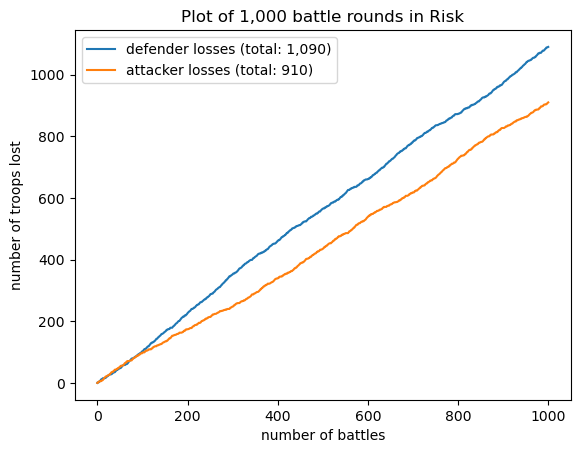

In [52]:
# Import numpy an matplotlib modules.
import numpy as np
import matplotlib.pyplot as plt

# Random number generator.
rng = np.random.default_rng()

# Number of rolls per battle and number of battles.
attack_dice_rolls = 3
defend_dice_rolls = 2
number_of_battles = 1000


# Generate numpy arrays for each battle and sort integers in ascending order.
# Ref: https://www.w3schools.com/python/numpy/numpy_array_sort.asp
# Ref: https://realpython.com/numpy-random-number-generator/#random-integer-numbers

attack_roll = np.sort(rng.integers(low=1, high=7, size=(number_of_battles,attack_dice_rolls)))
defend_roll = np.sort(rng.integers(low=1, high=7, size=(number_of_battles,defend_dice_rolls)))

# Slice the array to remove the low number in each attack roll.
attack_roll_top_2 = attack_roll[:number_of_battles,1:]

# The attack roll has to be greater than defend roll to win.
result = attack_roll_top_2 > defend_roll

# Total attacker and defender troops lost.
# https://wesmckinney.com/book/numpy-basics#ndarray_statistics
defender_losses = (result > 0).sum()
attacker_losses = ((number_of_battles * 2) - defender_losses)

# Sum the attacker and defender troops lost per battle
total_defender_losses = np.sum(result, axis=1)
total_attacker_losses = ((total_defender_losses - 2) * -1)

# Get a cumulative sum of the troops lost.
# https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html#numpy-cumsum
defend_cumulative = np.cumsum(total_defender_losses)
attack_cumulative = np.cumsum(total_attacker_losses)

# Insert a zero to the begining of each array for plotting.
defend = np.insert(defend_cumulative,0,0)
attack = np.insert(attack_cumulative,0,0)

# Set the x axis variable.
x = np.arange(0,(number_of_battles + 1), 1)

# Plot.
fig, ax = plt.subplots()

ax.plot(x, defend, label=f"defender losses (total: {defender_losses:,})")
ax.plot(x, attack, label=f"attacker losses (total: {attacker_losses:,})")

ax.set_title(f"Plot of {number_of_battles:,} battle rounds in Risk")
ax.set_xlabel("number of battles")
ax.set_ylabel("number of troops lost")
ax.legend()

plt.show()
